In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_dataset_path = 'C:/Users/katsa/OneDrive/Jupyter_files/shallow_models_online/cic_train_sample_binary.csv'
CICDataset_train = pd.read_csv(train_dataset_path)
X_train, y_train = CICDataset_train.iloc[:, :-1], CICDataset_train['Label']

In [3]:
# Create a pipeline with SimpleImputer, StandardScaler, and DecisionTreeClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier())
])

# Define the hyperparameter grid to search over
param_grid = {
    'clf__max_iter': [1000],
    'clf__hidden_layer_sizes': [(20,), (40,), (50,), (60,), (70,), (85,), (100,)]
}

# Create a GridSearchCV object with the pipeline and hyperparameter grid
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object on your training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'clf__hidden_layer_sizes': (60,), 'clf__max_iter': 1000}
Best score: 0.99


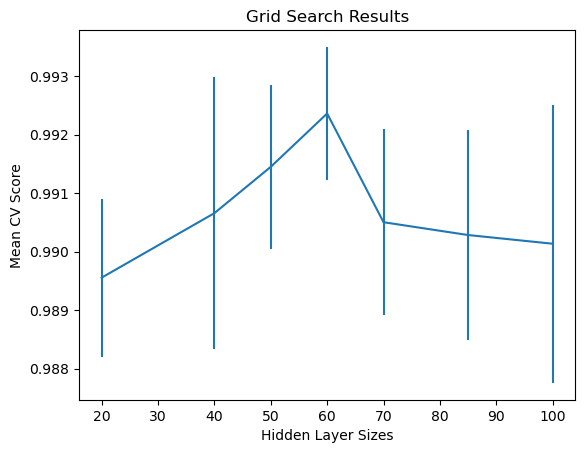

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the mean cross-validation scores and standard deviations
mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']

# Extract the hyperparameters
params = grid_search.cv_results_['params']
hidden_layer_sizes = [param['clf__hidden_layer_sizes'][0] for param in params]

# Plot the results
plt.errorbar(hidden_layer_sizes, mean_scores, yerr=std_scores)
plt.title("Grid Search Results")
plt.xlabel("Hidden Layer Sizes")
plt.ylabel("Mean CV Score")
plt.show()

In [6]:
with open('grid_search_results.txt', 'w') as f:
    f.write("Best parameters: {}\n".format(grid_search.best_params_))
    f.write("Best score: {:.2f}\n".format(grid_search.best_score_))
    f.write("All results:\n")
    for params, mean_score, std_score in zip(grid_search.cv_results_['params'], 
                                              grid_search.cv_results_['mean_test_score'], 
                                              grid_search.cv_results_['std_test_score']):
        f.write("{}: {:.2f} (+/- {:.2f})\n".format(params, mean_score, std_score))

In [8]:
# Set the precision of the results to 4 decimal places
np.set_printoptions(precision=8)

# Save the results to a text file
for key, value in grid_search.cv_results_.items():
    np.savetxt(f"{key}.txt", value, fmt='%s')